# Protein-Protein Interaction
This notebook describes the necessary steps for the protein-protein interaction network for all the genes in our reconstruction

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../Utils'))

from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import pickle
from google_sheet import GoogleSheet

# Data Fetching
import requests
import json
from pp_interactions import fetch_string_interactions, visualize_network

# Plotting
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Load secRecon dictionary

gene_dict_path = 'gene_dict.pkl'
with open(gene_dict_path, 'rb') as file:
    gene_dict = pickle.load(file)

# Create gene_list
gene_list = list(gene_dict.keys())

## 1.STRINGS PPI Networks

### 1.2 STRINGS - Sec Recon

In [ ]:
# Create the G graph object
G_string = fetch_string_interactions(gene_list)

# Draw the graph layout
pos = nx.spring_layout(G_string, seed=42, k=0.15, iterations=80)

# Add positions as node attributes
for node, (x, y) in pos.items():
    G_string.nodes[node]['x'] = x
    G_string.nodes[node]['y'] = y

# Save the network generated
nx.write_graphml(G_string, 'Network/string_interactions_sec_recon.graphml')

In [ ]:
G_string = nx.read_graphml('Network/string_interactions_sec_recon.graphml')
# Extract positions from the graph
pos = {node: (float(data['x']), float(data['y'])) for node, data in G_string.nodes(data=True)}
#filename = f"Network/STRING_interactions_localizationcolor.png"

visualize_network(G_string, gene_dict, pos, node_size=0.012, color_by='localization', legends=False)

### 1.2 STRINGS - Sec Recon + Human Secretome

In [ ]:
# Load Human Secretome df
human_secretome = pd.read_excel('Input/human_secretome.xlsx')
# Subset of all the secreted proteins
human_secretome = human_secretome[human_secretome['Annotated category'].str.contains('secreted', case=False)]
human_secretome_list = list(human_secretome_dict.keys())

In [ ]:
# Creating the dictionary
human_secretome_dict = {row['Gene name']: {'systems': ['Secreted'], 'subcellular_localization': ['Secreted']} for index, row in human_secretome.iterrows()}

In [ ]:
# Merging human secretome dictionary with gene_dict
gene_sec_dict = gene_dict.copy()

for key, value in human_secretome_dict.items():
    if key not in gene_sec_dict:
        gene_sec_dict[key] = value

In [ ]:
G_string = fetch_string_interactions(gene_list, extra_genes=human_secretome_list)

# Save the network generated
nx.write_graphml(G_string, 'Network/string_interactions_sec_recon_plus_secretome.graphml')

In [ ]:
color_code = 'localization' #systems

#G_string = nx.read_graphml('Network/string_interactions_sec_recon_plus_secretome.graphml') # Uncoment if reading the G object
filename = f"Network/STRING_interactions_secrecon_secretome_{color_code}.png"
visualize_network(G=G_string, node_size=0.010, filename=filename, dist=0.15, color_by=color_code, gene_dict=gene_sec_dict, legends=True) 

### 1.3 STRINGS - Sec Recon divided by Systems + Human Secretome

In [ ]:
# Criteria for subsetting
criteria = [
    'Protein conformation',
    'Post-translational modifications',
    'Proteostasis',
    'Translocation',
    'Vesicle trafficking'
]

# Initialize empty dictionaries for each criteria
subset_dicts = {criterion: {} for criterion in criteria}

# Iterate through the original dictionary and apply the criteria
for protein, details in gene_sec_dict.items():
    for criterion in criteria:
        if criterion in details['systems'] or 'Secreted' in details['systems']:
            subset_dicts[criterion][protein] = details

In [ ]:
proteostasis = subset_dicts['Proteostasis']

In [ ]:
G_string = fetch_string_interactions(proteostasis)

# Save the network generated
#nx.write_graphml(G_string, 'Network/string_interactions_sec_recon_plus_secretome.graphml')

In [ ]:
color_code = 'localization' #systems

G_string = nx.read_graphml('secRecon_networks/string_interactions_sec_recon_plus_secretome.graphml') # Uncoment if reading the G object
filename = f"secRecon_networks/STRING_interactions_proteostasis_secretome_{color_code}.png"
visualize_network(G=G_string, node_size=0.012, filename=filename, dist=0.15, color_by=color_code, gene_dict=gene_sec_dict, legends=False) 

### 1.4 STRINGS - Sec Recon + Metabolic Genes

In [3]:
# Load Human Secretome df
metabolic_genes = pd.read_csv('../Data/filtered_metabolic_genes.csv')

# Creating the dictionary
metabolic_genes_dict = {row['Human Gene Name']: {'systems': [row['system']], 'subcellular_localization': ['Metabolic']} for index, row in metabolic_genes.iterrows()}

In [4]:
metabolic_systems_colors = {
    'Lipid Metabolism': (0.5, 0.2, 0.7, 1.0),
    'Energy Metabolism': (0.8, 0.4, 0.2, 1.0),
    'Protein Product Synthesis': (0.2, 0.8, 0.6, 1.0),
    'Vitamin & Cofactor Metabolism': (0.9, 0.5, 0.3, 1.0),
    'Amino Acid Metabolism': (0.3, 0.7, 0.9, 1.0),
    'Nucleotide Metabolism': (0.6, 0.1, 0.8, 1.0),
    'Carbohydrates Metabolism': (0.4, 0.6, 0.2, 1.0),
}

In [5]:
# Merging metabolic dictionary with gene_dict
gene_secmet_dict = gene_dict.copy()

for key, value in metabolic_genes_dict.items():
    if key not in gene_secmet_dict:
        gene_secmet_dict[key] = value
        
gene_secmet_list = list(gene_secmet_dict.keys())

In [ ]:
G_string = fetch_string_interactions(gene_secmet_list)

In [ ]:
# Draw the graph layout
pos = nx.spring_layout(G_string, seed=42, k=0.10, iterations=80)

# Add positions as node attributes
for node, (x, y) in pos.items():
    G_string.nodes[node]['x'] = x
    G_string.nodes[node]['y'] = y

# Save the network generated
nx.write_graphml(G_string, 'secRecon_networks/string_interactions_sec_recon_plus_met.graphml')

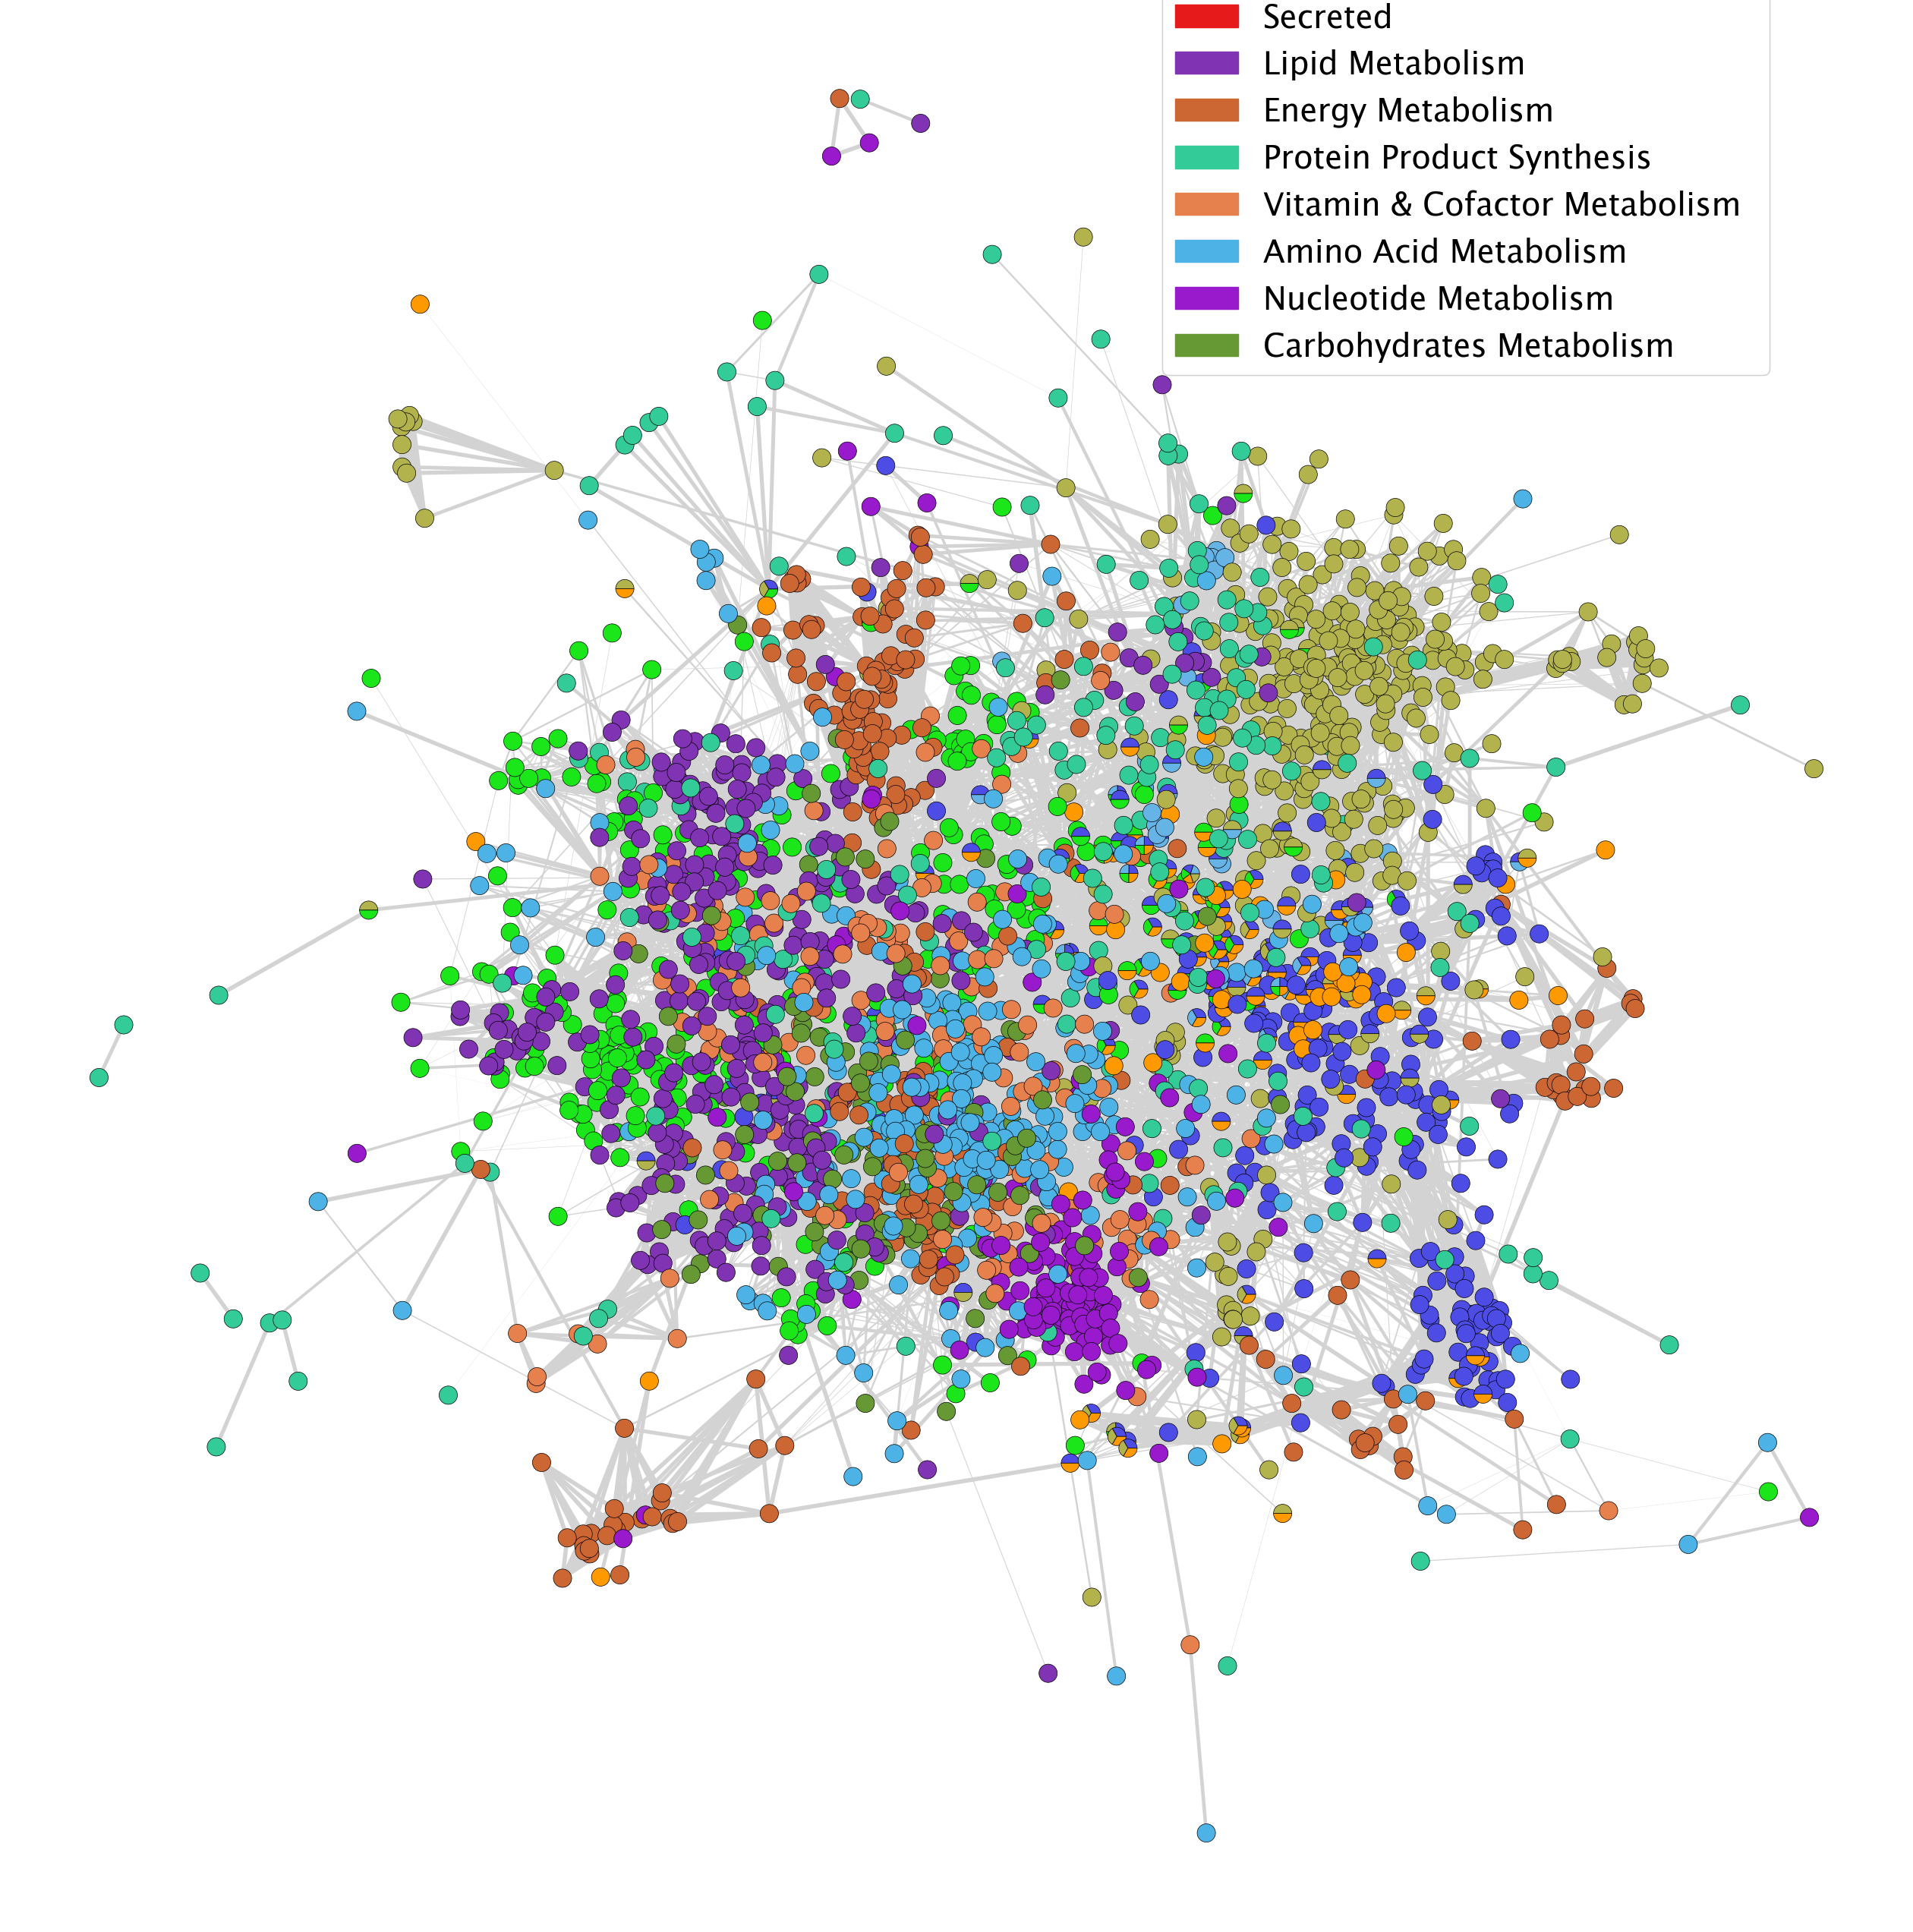

In [6]:
color_code = 'systems' #localization

G_string = nx.read_graphml('secRecon_networks/string_interactions_sec_recon_plus_met.graphml') # Uncoment if reading the G object

# Extract positions from the graph
pos = {node: (float(data['x']), float(data['y'])) for node, data in G_string.nodes(data=True)}

filename = f"secRecon_networks/STRING_interactions_secrecon_metgenes_{color_code}.svg"
visualize_network(G_string, gene_secmet_dict, pos, filename=filename, node_size=0.010, color_by='systems', legends=True, external_colors=metabolic_systems_colors)

## 2.PrePPI
For this part, create a python dict with the uniprot IDs from secrecon as keys and the gene symbols as values, then mapped those gene symbols to the preppi database.

https://www.sciencedirect.com/science/article/pii/S0022283623001080?via%3Dihub
https://honiglab.c2b2.columbia.edu/PrePPI/

In [ ]:
# Initialize an empty dictionary to store the UniProt ID as key and the Gene Symbol as value
uniprot_gene_dict = {}

# Iterate through each row in the DataFrame
for index, row in secrecon.iterrows():
    # Check if the UniProt field is not None or NaN
    if pd.notna(row['HUMAN UNIPROT']):
        # Split the UniProt IDs by comma
        uniprot_ids = row['HUMAN UNIPROT'].split(',')
        # Map each UniProt ID to the gene symbol
        for uniprot_id in uniprot_ids:
            uniprot_gene_dict[uniprot_id.strip()] = row['GENE SYMBOL']

In [ ]:
preppi_file_path = 'Input/preppi_interactome/preppi.human_af.interactome.txt'
preppi_df = pd.read_csv(preppi_file_path, sep='\t')

In [ ]:
preppi_df

In [ ]:
# Map 'prot1' and 'prot2' using the dictionary
preppi_df['prot1_gene_symbol'] = preppi_df['prot1'].map(uniprot_gene_dict)
preppi_df['prot2_gene_symbol'] = preppi_df['prot2'].map(uniprot_gene_dict)

In [ ]:
filtered_df = preppi_df.dropna(subset=['prot1_gene_symbol', 'prot2_gene_symbol'])

In [ ]:
filtered_df = preppi_df.dropna(subset=['prot1_gene_symbol', 'prot2_gene_symbol'])

In [ ]:
filtered_df

In [ ]:
# Initialize an empty graph
G_preppi = nx.Graph()

seen_interactions = set()

for i,row in filtered_df.iterrows():
    protein1 = row['prot1_gene_symbol']
    protein2 = row['prot2_gene_symbol']
    interaction_tuple = (protein1, protein2)
    # Remove proteins interacting with themselves
    if protein1 != protein2:
        # Check if interaction is already seen, considering both directions
        if interaction_tuple not in seen_interactions and (protein2, protein1) not in seen_interactions:
            score = row['total_score']
            # Add nodes and edges to the graph if interaction is new
            G_preppi.add_node(protein1)
            G_preppi.add_node(protein2)
            G_preppi.add_edge(protein1, protein2, weight=score)
            # Add to seen interactions in both orders
            seen_interactions.add(interaction_tuple)
            seen_interactions.add((protein2, protein1))

In [ ]:


def visualize_network(G, main_genes=None, node_size=0.010, filename=None,dist=0.15, itrs=80, color_by='systems', gene_dict=dict, legends=True):
    """
    Visualize a protein-protein interaction network using matplotlib.
    
    Parameters:
    - G (networkx.Graph): The graph to visualize.
    - main_genes (list, optional): List of gene names for the title.
    - node_size (int, optional): Size of the nodes.
    - labels_size (int, optional): Font size for labels.
    - filename (str, optional): If provided, save the plot to this filename.
    """

    system_colors = {
    'Protein conformation': (1.0, 0.6, 0.0, 1.0),
    'Post-translational modifications': (0.1, 0.9, 0.1, 1.0), 
    'Proteostasis': (0.3, 0.3, 0.9, 1.0),
    'Translocation': (0.4, 0.7, 0.9, 1.0),
    'Vesicle trafficking': (0.7, 0.7, 0.3, 1.0),
    'Secreted': (0.9, 0.1, 0.1, 1.0)
    }
    # Scale edge widths
    edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
    min_width = 0.1
    max_width = 1
    epsilon = 1e-10
    edge_weights = [min_width + (w - min(edge_weights)) * (max_width - min_width) / (max(edge_weights) - min(edge_weights) + epsilon) for w in edge_weights]
    
    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(40, 40))
    
    # Draw the network
    pos = nx.spring_layout(G, seed=42, k=dist, iterations=itrs)
    
    
    # Draw edges with scaled widths
    nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color='lightgray', ax=ax)

    # Draw nodes as pie charts
    if color_by == 'systems':
        for node, (x, y) in pos.items():
            systems = gene_dict[node]['systems']
            colors = [system_colors[sys] for sys in systems]
            ax.pie([1]*len(systems), colors=colors, radius=node_size, center=(x, y), wedgeprops=dict(edgecolor='black', linewidth=0.5))

    elif color_by == 'localization':
        for node, (x, y) in pos.items():
            localizations = gene_dict[node]['subcellular_localization']
            colors = [localization_colors[loc] for loc in localizations]
            ax.pie([1]*len(localizations), colors=colors, radius=0.012, center=(x, y), wedgeprops=dict(edgecolor='black', linewidth=0.5))
    
    # Get the current axis limits
    x_values, y_values = zip(*pos.values())
    min_x, max_x = min(x_values), max(x_values)
    min_y, max_y = min(y_values), max(y_values)
    
    # Set new axis limits
    ax.set_xlim(min_x - 0.1, max_x + 0.1)
    ax.set_ylim(min_y - 0.1, max_y + 0.1)

    # Legend
    if legends:
        if color_by == 'systems':
            legend_patches = [mpatches.Patch(color=color, label=category) for category, color in system_colors.items()]
            plt.legend(handles=legend_patches, prop={'size': 25}, loc='lower left', bbox_to_anchor=(0.9, 0.6))
            plt.subplots_adjust(right=0.75)
        elif color_by == 'localization':
            legend_patches = [mpatches.Patch(color=color, label=category) for category, color in localization_colors.items()]
            plt.legend(handles=legend_patches, prop={'size': 20}, loc='lower left', bbox_to_anchor=(0.9, 0.6))
            plt.subplots_adjust(right=0.75)
    
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
         
    plt.show()

In [ ]:
filename = f"Network/PrePPI_interactions_localizationcolor.png"
visualize_network(G=G_preppi, node_size=0.012, filename=filename, dist=2, itrs=80, color_by='systems', gene_dict=gene_dict, legends=False) 

## 3. Network Clustering with Functional and Subcellular Correlation

In [ ]:
import pickle
import pandas as pd
import numpy as np
import networkx as nx
import community.community_louvain as community_louvain
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import normalized_mutual_info_score
from scipy.stats import chi2_contingency
from collections import defaultdict

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# -----------------------------
# Step 1: Load the Network and Gene Data
# -----------------------------

# Load the network from a GraphML file
G = nx.read_graphml('Network/string_interactions_sec_recon.graphml')

# Load the gene dictionary from a pickle file
gene_dict_path = 'gene_dict.pkl'
with open(gene_dict_path, 'rb') as file:
    gene_dict = pickle.load(file)

In [ ]:
# -----------------------------
# Step 2: Evaluate the best resolution for the Louvain algortihm
# -----------------------------

# Set a range of resolution values to test
resolutions = np.linspace(0.5, 2.5, 20)  # Adjust this range and number as needed

# Lists to store results
modularity_scores = []
nmi_scores_localization = []
nmi_scores_systems = []

# Iterate over the resolutions to perform community detection and evaluate modularity and NMI
for resolution in resolutions:
    # Perform community detection using the Louvain algorithm
    partition = community_louvain.best_partition(G, weight='weight', resolution=resolution)
    
    # Assign cluster labels to nodes as a node attribute
    nx.set_node_attributes(G, partition, 'cluster')
    
    # Calculate modularity score
    modularity = community_louvain.modularity(partition, G, weight='weight')
    modularity_scores.append(modularity)
    
    # Calculate NMI score by comparing cluster labels and primary localization
    primary_localization = {node: gene_dict[node]['subcellular_localization'][0] for node in G.nodes()}
    cluster_labels = [partition[node] for node in G.nodes()]
    localization_labels = [primary_localization[node] for node in G.nodes()]
    nmi_score_localization = normalized_mutual_info_score(cluster_labels, localization_labels)
    nmi_scores_localization.append(nmi_score_localization)
    
    # Calculate NMI score by comparing cluster labels and systems
    primary_system = {node: gene_dict[node]['systems'][0] for node in G.nodes()}
    system_labels = [primary_system[node] for node in G.nodes()]
    nmi_score_systems = normalized_mutual_info_score(cluster_labels, system_labels)
    nmi_scores_systems.append(nmi_score_systems)

In [ ]:
# -----------------------------
# Step 3: Determine the Best Trade-off Point
# -----------------------------

# Normalize the scores to [0, 1] range
scaler = MinMaxScaler()

normalized_modularity_scores = scaler.fit_transform(np.array(modularity_scores).reshape(-1, 1)).flatten()
normalized_nmi_scores_localization = scaler.fit_transform(np.array(nmi_scores_localization).reshape(-1, 1)).flatten()
normalized_nmi_scores_systems = scaler.fit_transform(np.array(nmi_scores_systems).reshape(-1, 1)).flatten()

# Compute combined score
combined_scores = normalized_modularity_scores + normalized_nmi_scores_localization + normalized_nmi_scores_systems

# Find the resolution that maximizes the combined score
best_index = np.argmax(combined_scores)
best_resolution = resolutions[best_index]

In [ ]:
# -----------------------------
# Step 4: Plot the Elbow Plot with the Best Trade-off Point
# -----------------------------

# Plotting the elbow plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot modularity scores
color = 'tab:blue'
ax1.set_xlabel('Resolution Parameter', fontsize=18)
ax1.set_ylabel('Modularity', color=color, fontsize=18)
ax1.plot(resolutions, modularity_scores, '-o', color=color, label='Modularity', linewidth=2, markersize=8)
ax1.tick_params(axis='y', labelcolor=color, labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.set_title('Functional Topology - Community Detection', fontsize=20)

# Create a second y-axis for NMI scores (subcellular localization)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('NMI Score', color=color, fontsize=18)  # we already handled the x-label with ax1
ax2.plot(resolutions, nmi_scores_localization, '-o', color=color, label='NMI Score (Localization)', linewidth=2, markersize=8)
ax2.tick_params(axis='y', labelcolor=color, labelsize=14)

# Plot NMI scores (systems) on the same second y-axis with a different color
color = 'tab:green'
ax2.plot(resolutions, nmi_scores_systems, '-o', color=color, label='NMI Score (Systems)', linewidth=2, markersize=8)

# Add vertical dotted line at the best resolution
ax1.axvline(x=best_resolution, color='gray', linestyle='--', linewidth=2)

# Annotate the best resolution
ax1.text(best_resolution, ax1.get_ylim()[0], f'Best Resolution: {best_resolution:.2f}',
         rotation=90, va='bottom', ha='right', fontsize=14, color='gray')

# Add legend to differentiate the lines
fig.legend(loc='upper right', bbox_to_anchor=(0.9, 0.9), fontsize=18)

# Show the plot
fig.tight_layout()  # to make sure everything fits nicely

plt.savefig('Plots/elbow_ppi.svg', format='svg', dpi=300, bbox_inches='tight')

plt.show()

In [ ]:
# -----------------------------
# Step 2: Perform Community Detection
# -----------------------------

# Set the desired resolution parameter
desired_resolution = 1.66  # Adjust this value to control the number of clusters

# Perform community detection using the Louvain algorithm
partition = community_louvain.best_partition(G, weight='weight', resolution=desired_resolution)

# Assign cluster labels to nodes as a node attribute
nx.set_node_attributes(G, partition, 'cluster')

### 3.1 Subcellular Localization Correlation

In [ ]:
localization_colors = {
    'Actin Cytoskeleton': (0.7, 0.4, 0.2, 1.0),
    'Centrosome': (0.0, 0.5, 0.5, 1.0),
    'ERGIC': (1.0, 0.6, 0.0, 1.0),
    'Endosome': (0.0, 0.7, 0.3, 1.0), 
    'Recycling Endosome': (0.3, 0.0, 0.7, 1.0),
    'Late Endosome': (0.8, 0.0, 0.5, 1.0),
    'Early Endosome': (0.7, 0.0, 0.4, 1.0), 
    'Plasma Membrane': (0.5, 0.5, 0.0, 1.0), 
    'Golgi': (0.1, 0.9, 0.1, 1.0), 
    'cis-Golgi': (0.2, 0.8, 0.6, 1.0),
    'trans-Golgi': (0.4, 0.8, 0.4, 1.0), 
    'Nucleus': (0.9, 0.1, 0.1, 1.0),
    'Nucleolus': (0.5, 0.1, 0.1, 1.0),
    'Phagosome': (0.6, 0.3, 0.0, 1.0),
    'Proteasome': (0.3, 0.3, 0.9, 1.0),
    'Mitochondria': (0.9, 0.5, 0.5, 1.0),
    'Lysosome': (0.5, 0.9, 0.8, 1.0),  
    'Cytosol': (0.3, 0.8, 0.95, 1.0),
    'Cytoplasm': (0.4, 0.7, 0.9, 1.0),
    'Endoplasmic Reticulum': (0.7, 0.7, 0.3, 1.0),
    'Secreted': (0.8, 0.4, 0.0, 1.0),
    'Stress Granule': (0.9, 0.3, 0.05, 1.0),
    'Translation': (0.8, 0.2, 0.8, 1.0),
    'Unknown': (0.0, 0.0, 0.0, 1.0)
}

In [ ]:
# -----------------------------
# Step 3: Build the Contingency Table for subcellular localization
# -----------------------------

# Initialize a nested dictionary to hold counts
cluster_localization = defaultdict(lambda: defaultdict(int))

# Populate the contingency table with counts of genes per cluster per localization
for node in G.nodes():
    cluster = G.nodes[node]['cluster']
    localizations = gene_dict[node]['subcellular_localization']
    for loc in localizations:
        cluster_localization[cluster][loc] += 1

# Convert the nested dictionary to a pandas DataFrame
contingency_table = pd.DataFrame(cluster_localization).fillna(0).astype(int).T

In [ ]:
# -----------------------------
# Step 4: Perform Chi-Squared Test with Adjusted P-value Reporting
# -----------------------------

# Conduct the chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results with adjusted p-value reporting
print(f"Chi-squared Statistic: {chi2}")
if p < 1e-16:
    print("P-value: < 1e-16")
else:
    print(f"P-value: {p}")

# Check minimum expected frequency
print(f"Minimum expected frequency: {expected.min()}")

In [ ]:
# -----------------------------
# Step 5: Calculate Normalized Mutual Information (NMI)
# -----------------------------

# Assign the primary subcellular localization to each gene (first in the list)
primary_localization = {
    node: gene_dict[node]['subcellular_localization'][0] for node in G.nodes()
}

# Get lists of cluster labels and localization labels
cluster_labels = [partition[node] for node in G.nodes()]
localization_labels = [primary_localization[node] for node in G.nodes()]

# Calculate the NMI score
nmi_score = normalized_mutual_info_score(cluster_labels, localization_labels)

# Output the NMI score
print(f"Normalized Mutual Information (NMI) Score: {nmi_score}")

In [ ]:
# -----------------------------
# Step 6: Visualize the Distribution
# -----------------------------

# Calculate the total number of genes per cluster
cluster_totals = contingency_table.sum(axis=1)

# Identify clusters with more than 50 genes
clusters_to_plot = cluster_totals[cluster_totals > 50].index

# Filter the contingency table
contingency_table_filtered = contingency_table.loc[clusters_to_plot]

# Melt the contingency table for better plotting
contingency_table_melted = contingency_table_filtered.reset_index().melt(id_vars='index')
contingency_table_melted.columns = ['Cluster', 'Localization', 'Count']

# Plot the distribution of subcellular localizations across clusters
plt.figure(figsize=(16, 8))
sns.barplot(
    data=contingency_table_melted,
    x='Cluster',
    y='Count',
    hue='Localization',
    palette=localization_colors
)
plt.title('Distribution of Subcellular Localizations Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Genes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3.2 Systems Correlation

In [ ]:
system_colors = {
    'Protein conformation': (1.0, 0.6, 0.0, 1.0),
    'Post-translational modifications': (0.1, 0.9, 0.1, 1.0), 
    'Proteostasis': (0.3, 0.3, 0.9, 1.0),
    'Translocation': (0.4, 0.7, 0.9, 1.0),
    'Vesicle trafficking': (0.7, 0.7, 0.3, 1.0)
}

In [ ]:
# -----------------------------
# Step 3: Build the Contingency Table for systems
# -----------------------------

# Initialize a nested dictionary to hold counts
cluster_localization = defaultdict(lambda: defaultdict(int))

# Populate the contingency table with counts of genes per cluster per localization
for node in G.nodes():
    cluster = G.nodes[node]['cluster']
    localizations = gene_dict[node]['systems']
    for loc in localizations:
        cluster_localization[cluster][loc] += 1

# Convert the nested dictionary to a pandas DataFrame
contingency_table = pd.DataFrame(cluster_localization).fillna(0).astype(int).T

In [ ]:
# -----------------------------
# Step 4: Perform Chi-Squared Test with Adjusted P-value Reporting
# -----------------------------

# Conduct the chi-squared test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results with adjusted p-value reporting
print(f"Chi-squared Statistic: {chi2}")
if p < 1e-16:
    print("P-value: < 1e-16")
else:
    print(f"P-value: {p}")

# Check minimum expected frequency
print(f"Minimum expected frequency: {expected.min()}")

In [ ]:
# -----------------------------
# Step 5: Calculate Normalized Mutual Information (NMI)
# -----------------------------

# Assign the primary subcellular localization to each gene (first in the list)
primary_localization = {
    node: gene_dict[node]['systems'][0] for node in G.nodes()
}

# Get lists of cluster labels and localization labels
cluster_labels = [partition[node] for node in G.nodes()]
localization_labels = [primary_localization[node] for node in G.nodes()]

# Calculate the NMI score
nmi_score = normalized_mutual_info_score(cluster_labels, localization_labels)

# Output the NMI score
print(f"Normalized Mutual Information (NMI) Score: {nmi_score}")

In [ ]:
# -----------------------------
# Step 6: Visualize the Distribution
# -----------------------------

# Calculate the total number of genes per cluster
cluster_totals = contingency_table.sum(axis=1)

# Identify clusters with more than 50 genes
clusters_to_plot = cluster_totals[cluster_totals > 50].index

# Filter the contingency table
contingency_table_filtered = contingency_table.loc[clusters_to_plot]

# Melt the contingency table for better plotting
contingency_table_melted = contingency_table_filtered.reset_index().melt(id_vars='index')
contingency_table_melted.columns = ['Cluster', 'System', 'Count']

# Plot the distribution of subcellular localizations across clusters
plt.figure(figsize=(12, 8))
sns.barplot(
    data=contingency_table_melted,
    x='Cluster',
    y='Count',
    hue='System',
    palette=system_colors
)
plt.title('Distribution of Systems Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Genes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4. Save in a Cytoscape compatible format

In [ ]:
localization_colors = {
    'Actin Cytoskeleton': (0.7, 0.4, 0.2, 1.0),
    'Centrosome': (0.0, 0.5, 0.5, 1.0),
    'ERGIC': (1.0, 0.6, 0.0, 1.0),
    'Endosome': (0.0, 0.7, 0.3, 1.0), 
    'Recycling Endosome': (0.3, 0.0, 0.7, 1.0),
    'Late Endosome': (0.8, 0.0, 0.5, 1.0),
    'Early Endosome': (0.7, 0.0, 0.4, 1.0), 
    'Plasma Membrane': (0.5, 0.5, 0.0, 1.0), 
    'Golgi': (0.1, 0.9, 0.1, 1.0), 
    'cis-Golgi': (0.2, 0.8, 0.6, 1.0),
    'trans-Golgi': (0.4, 0.8, 0.4, 1.0), 
    'Nucleus': (0.9, 0.1, 0.1, 1.0),
    'Nucleolus': (0.5, 0.1, 0.1, 1.0),
    'Phagosome': (0.6, 0.3, 0.0, 1.0),
    'Proteasome': (0.3, 0.3, 0.9, 1.0),
    'Mitochondria': (0.9, 0.5, 0.5, 1.0),
    'Lysosome': (0.5, 0.9, 0.8, 1.0),  
    'Cytosol': (0.3, 0.8, 0.95, 1.0),
    'Cytoplasm': (0.4, 0.7, 0.9, 1.0),
    'Endoplasmic Reticulum': (0.7, 0.7, 0.3, 1.0),
    'Secreted': (0.8, 0.4, 0.0, 1.0),
    'Stress Granule': (0.9, 0.3, 0.05, 1.0),
    'Translation': (0.8, 0.2, 0.8, 1.0),
    'Unknown': (0.0, 0.0, 0.0, 1.0)
}

In [ ]:
# Create a copy of the graph to preserve positions and colors
H = nx.Graph(G_string)

# Define a scaling factor
scaling_factor = 1500

# Convert localization color to hex string for Cytoscape
for node in H.nodes():
    localizations = gene_dict[node]['subcellular_localization']
    colors = [localization_colors[loc] for loc in localizations]

    # If there are multiple localizations, choose the first color for now
    if len(colors) == 1:
        hex_color = '#{:02x}{:02x}{:02x}'.format(
            int(colors[0][0] * 255), int(colors[0][1] * 255), int(colors[0][2] * 255))
        H.nodes[node]['color'] = hex_color
    else:
        # If multiple colors, you can pick the first
        hex_color = '#{:02x}{:02x}{:02x}'.format(
            int(colors[0][0] * 255), int(colors[0][1] * 255), int(colors[0][2] * 255))
        H.nodes[node]['color'] = hex_color

# Add positions to nodes
for node, (x, y) in pos.items():
    H.nodes[node]['x'] = x*scaling_factor  # Keep the position as floats for GraphML compatibility
    H.nodes[node]['y'] = y*scaling_factor
    
# Remove edges with weights below 1.0
#edges_to_remove = [(u, v) for u, v, data in H.edges(data=True) if data['weight'] < 1.0]
#H.remove_edges_from(edges_to_remove)

# Add metadata from the dictionary to the nodes
for gene, metadata in gene_dict.items():
    try:
        # For each gene, add the corresponding metadata as node attributes
        H.nodes[gene]['Systems'] = ', '.join(metadata['systems'])  # Join lists into comma-separated strings
        H.nodes[gene]['Subsystems'] = ', '.join(metadata['subsystems'])
        H.nodes[gene]['Processes'] = ', '.join(metadata['processes'])
        H.nodes[gene]['Subprocesses'] = ', '.join(metadata['subprocesses'])
        H.nodes[gene]['Subcellular_localization'] = ', '.join(metadata['subcellular_localization'])
        H.nodes[gene]['Protein_complexes'] = ', '.join(metadata['protein_complex'])
    except KeyError:
        print(f'Gene {gene} not present in PPI interaction map')

# Export the graph to GraphML format
nx.write_graphml(H, 'Network/string_interactions_sec_recon_cytoscape.graphml')